In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np

: 

In [18]:
data = pd.read_csv("./amostra_piloto.csv")
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,164,6.773387,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
1,165,6.773478,192.168.15.4,192.168.15.3,MQTT,68,Disconnect Req
2,170,6.776184,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
3,171,6.776305,192.168.15.3,192.168.15.4,MQTT,70,Connect Ack
4,176,6.778768,192.168.15.4,192.168.15.3,MQTT,171,Publish Message (id=1) [Deviceb'Device - 1']
...,...,...,...,...,...,...,...
3065,14668,640.452263,192.168.15.3,192.168.15.4,MQTT,70,Connect Ack
3066,14671,640.454599,192.168.15.3,192.168.15.4,MQTT,70,Publish Ack (id=609)
3067,14673,640.455079,192.168.15.4,192.168.15.3,MQTT,68,Disconnect Req
3068,15099,696.933512,192.168.15.4,192.168.15.3,MQTT,68,Ping Request


In [3]:
array_publish = []
array_publish_ack = []

for i in range(len(data)):
    if re.search("Publish Message", data.loc[i, "Info"]):
        array_publish.append(i)
    if re.search("Publish Ack ", data.loc[i, "Info"]):
        array_publish_ack.append(i)


In [21]:
RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
for i in array_publish:
    init = re.search("id=", data.loc[i, "Info"]).span()[1]
    end = re.search("\)", data.loc[i, "Info"]).span()[0]
    index = data.loc[i, "Info"][init:end]
    RTT.loc[index,"Time_publish"]  = float(data.loc[i, "Time"])
    

for i in array_publish_ack:
    init = re.search("id=", data.loc[i, "Info"]).span()[1]
    end = re.search("\)", data.loc[i, "Info"]).span()[0]
    index = data.loc[i, "Info"][init:end]
    RTT.loc[index,"Time_ack"]  = float(data.loc[i, "Time"])


In [22]:
RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000

In [24]:
RTT.head(5)

,Time_publish,Time_ack,RTT
1,6.778768,6.781292,2.523318
2,7.78846,7.790911,2.450871
3,8.798941,8.801384,2.443157
4,9.809386,9.81185,2.464106
5,10.828649,10.840241,11.592292


In [6]:
print("média = {}".format(RTT["RTT"].mean()))
print("mediana = {}".format(RTT["RTT"].median()))
print("máximo = {}".format(RTT["RTT"].max()))
print("minimo = {}".format(RTT["RTT"].min()))
print("25% = {}".format(RTT["RTT"].quantile(0.25)))
print("50% = {}".format(RTT["RTT"].quantile()))
print("75% = {}".format(RTT["RTT"].quantile(0.75)))
print("90% = {}".format(RTT["RTT"].quantile(0.90)))
print("95% = {}".format(RTT["RTT"].quantile(0.95)))
print("99% = {}".format(RTT["RTT"].quantile(0.99)))
print("std = {}".format(RTT["RTT"].std()))

média = 4.568722435137397
mediana = 2.90858500000013
máximo = 223.12551000004532
minimo = 1.5643510000131755
25% = 2.775453000026573
50% = 2.90858500000013
75% = 5.5885379999836005
90% = 6.870821399979832
95% = 8.621210399996926
99% = 14.799397240020642
std = 9.329458861571394


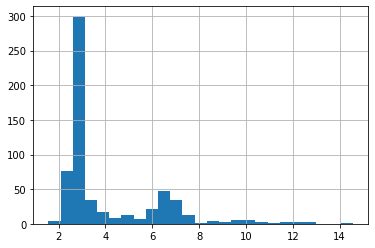

In [7]:
RTT["RTT"].loc[RTT["RTT"]>=8]
fig, ax=plt.subplots()
ax.hist(x=RTT["RTT"].loc[RTT["RTT"]<=14.799397240020642], bins=25)
ax.grid();

In [8]:
RTT

,Time_publish,Time_ack,RTT
1,6.778768,6.781292,2.523318
2,7.78846,7.790911,2.450871
3,8.798941,8.801384,2.443157
4,9.809386,9.81185,2.464106
5,10.828649,10.840241,11.592292
...,...,...,...
605,636.351655,636.354669,3.014445
606,637.362432,637.365262,2.829674
607,638.411163,638.414149,2.98542
608,639.421232,639.425329,4.097334


# <font color=green>CÁLCULO DO TAMANHO DA AMOSTRA</font>
***

## <font color=green>Variáveis quantitativas e população infinita</font>
***


## Nívéis de confiança e significância 

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

Em nosso trabalho iremos utilizar um nivel de confiança de 95%, logo abaixo iremos calcular o Z.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

In [9]:
nivel_de_significancia = 0.05

In [10]:
nivel_de_confiança = 1 - nivel_de_significancia
nivel_de_confiança

0.95

In [11]:
#Calculando o z com scipy
z = scipy.stats.norm.ppf(0.975)
z

1.959963984540054

Com nosso z calculado podemos seguir adiante

### $$z = 1.959963984540054 $$

Abaixo segue algumas formulas que iremos utilizar para calcular o numero de amostra



## $$n = \left(z\frac{s}{e}\right)^2$$


$$e = \left(e *  \right)^2$$



Onde:

$z$ = variável normal padronizada

$s$ = desvio padrão amostral

$e$ = erro inferencial




### Calculando a desvio padrão $s$

In [25]:
desvio_padrao_amostral = RTT["RTT"].std()
desvio_padrao_amostral

9.329458861571394

### Calculando o Erro

In [13]:
media = RTT["RTT"].mean()
e = 0.05 * media
e

0.2284361217568699

### Calculando o tamanho da nossa amostra

In [14]:
n = (z * (desvio_padrao_amostral/e))**2
n